## Filter compensation with the ripasso module

The broadbean module gets a helping hand from the ripasso module when it needs to compensate for transfer functions of transmission lines.

The ripasso module lets us apply filters and their inverses to signals.

The module has two build-in types of filter, namely an RC-circuit high-pass and an RC-circuit low-pass. The transfer functions are

$$
H_n(f)=\left(\frac{2\pi f\mathrm{i}\tau}{1+2\pi f\mathrm{i}\tau }\right)^{n},
$$
for the nth order high-pass and
$$
L_n(f)=\left(\frac{1}{1+2\pi f\mathrm{i}\tau }\right)^{n},
$$
for the nth order low-pass. The parameter $\tau$ is one over the cutoff-frequency.



In [101]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys
if '..' not in sys.path:
    sys.path.append('..')
from ripasso import applyRCFilter, applyInverseRCFilter

In [102]:
def squarewave(npts, periods=5):

    periods = int(periods)
    array = np.zeros(npts, dtype=complex)

    for n in range(periods):
        array[int(n*npts/periods): int((2*n+1)*npts/2/periods)] = 1

    return array

## RC Filters

In [103]:
# Let's make some signals!

SR = int(10e3)
npts = int(10e3)

f_cut = 12  # filter cut-off frequency (Hz)

time = np.linspace(0, npts/SR, npts)
T = time[-1]

signal1 = np.sin(2*np.pi*5/T*time)+0.7*np.cos(2*np.pi*1/T*time)
signal2 = squarewave(npts, periods=4)

In [104]:
# Then we may high-pass them or low-pass them

filtertype = 'HP'
# filtertype = 'LP'

signal1_filt = applyRCFilter(signal1, SR, filtertype, f_cut, order=1)
signal2_filt = applyRCFilter(signal2, SR, filtertype, f_cut, order=1)

<IPython.core.display.Javascript object>


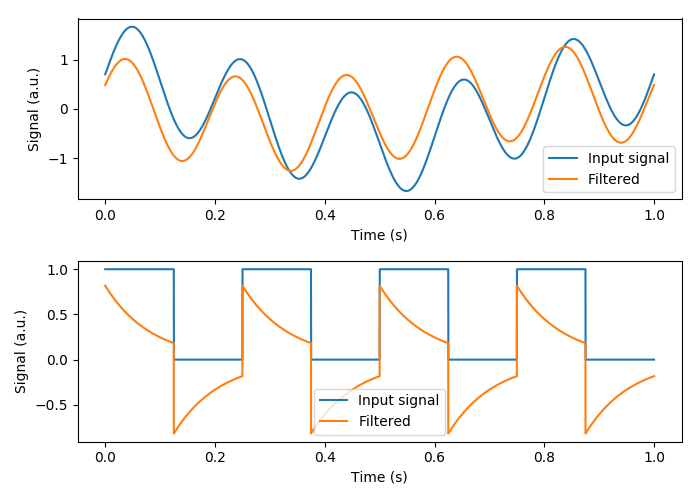

/Users/william/.pyenv/versions/3.5.3/envs/qcodesmaster/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [105]:
# And inspect the result

fig, axs = plt.subplots(2, 1)
axs[0].plot(time, signal1, label='Input signal')
axs[0].plot(time, signal1_filt, label='Filtered')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal (a.u.)')
axs[0].legend()

axs[1].plot(time, signal2, label='Input signal')
axs[1].plot(time, signal2_filt, label='Filtered')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Signal (a.u.)')
axs[1].legend()

plt.tight_layout()

In [106]:
# Similarly, we may pre-compensate for the filters

# Note that we specify a DC gain for the inverse filters. This is because it is not possible
# to compensate for the true DC gain of zero of an RC high pass. Instead, we specify the
# gain of the high-pass filter at DC. The compensated signal will have a mean value of 1/DCgain
# times the mean of the input signal


signal1_comp = applyInverseRCFilter(signal1, SR, filtertype, f_cut, order=1, DCgain=1)
signal2_comp = applyInverseRCFilter(signal2, SR, filtertype, f_cut, order=1, DCgain=1)

<IPython.core.display.Javascript object>


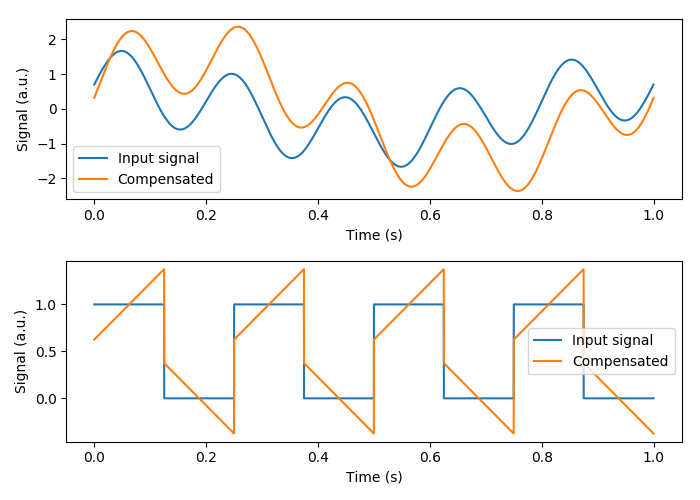

/Users/william/.pyenv/versions/3.5.3/envs/qcodesmaster/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [107]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(time, signal1, label='Input signal')
axs[0].plot(time, signal1_comp, label='Compensated')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal (a.u.)')
axs[0].legend()

axs[1].plot(time, signal2, label='Input signal')
axs[1].plot(time, signal2_comp, label='Compensated')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Signal (a.u.)')
axs[1].legend()

plt.tight_layout()

<IPython.core.display.Javascript object>


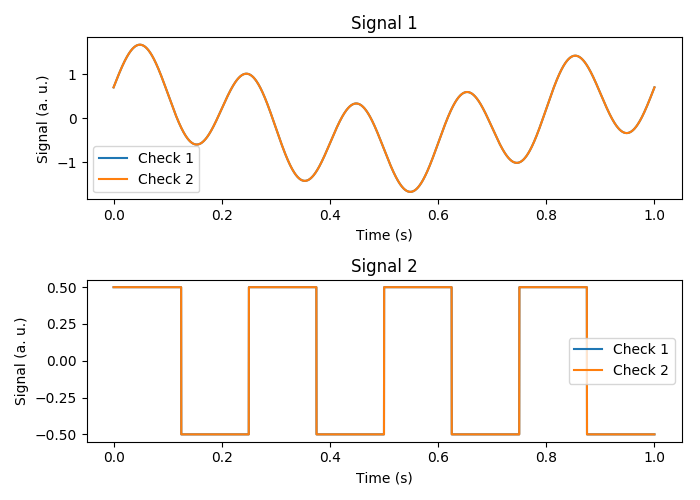

In [111]:
# As a sanity-check, we may filter and compensate and compare
#
# Do we recover the original signals?

signal1_check1 = applyRCFilter(signal1_comp, SR, filtertype, f_cut, order=1)
signal1_check2 = applyInverseRCFilter(signal1_filt, SR, filtertype, f_cut, order=1)

signal2_check1 = applyRCFilter(signal2_comp, SR, filtertype, f_cut, order=1)
signal2_check2 = applyInverseRCFilter(signal2_filt, SR, filtertype, f_cut, order=1)

fig, axs = plt.subplots(2, 1)
axs[0].set_title('Signal 1')
axs[0].plot(time, signal1_check1, label='Check 1')
axs[0].plot(time, signal1_check2, label='Check 2')
axs[0].legend()
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal (a. u.)')

axs[1].set_title('Signal 2')
axs[1].plot(time, signal2_check1, label='Check 1')
axs[1].plot(time, signal2_check2, label='Check 2')
axs[1].legend()
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Signal (a. u.)')

plt.tight_layout()

## User-supplied transfer function

..coming soon...